# Session block table document

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Numerical-data" data-toc-modified-id="Numerical-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Numerical data</a></span></li><li><span><a href="#Categorical-data" data-toc-modified-id="Categorical-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Categorical data</a></span></li></ul></div>

## Introduction

In this document there will be statistical analysis of Session_blocks table. 
Session_blocks table has 8 variables (columns) and 2986 records. 
For the analysis below libraries will be used:

* pandas
* numpy
* statistics
* matplotlib.pyplot
* seaborn
* pingouin
* distfit

Below there are information and glimpse of this dataset. 

In [5]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pingouin as pg
import statsmodels.api as sm
import matplotlib as mpl
from scipy import stats
from distfit import distfit

session_blocks = pd.read_csv('C:/Users/admin/Desktop/mhunters/session_blocks.csv', on_bad_lines='skip', low_memory=False, header = None, na_values = "\\N")
session_blocks.columns = ['id', 'session_id', 'time_duration', 
                              'created_at', 'updated_at',
                              'order', 'block_type', 'loop']


pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["image.cmap"] = "Pastel2"

In [6]:
session_blocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2986 entries, 0 to 2985
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2986 non-null   int64  
 1   session_id     2986 non-null   int64  
 2   time_duration  25 non-null     float64
 3   created_at     2986 non-null   object 
 4   updated_at     2986 non-null   object 
 5   order          2762 non-null   float64
 6   block_type     2986 non-null   int64  
 7   loop           2986 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 186.8+ KB


In [7]:
session_blocks.head()

,id,session_id,time_duration,created_at,updated_at,order,block_type,loop
0,62,41,NaN,2020-11-24 15:29:07.833243,2020-11-24 15:29:07.833243,1.00,0,f
1,3239,1849,NaN,2021-11-30 05:58:55.042953,2021-11-30 05:58:55.042953,1.00,19,f
2,3240,1850,NaN,2021-11-30 12:37:54.467049,2021-11-30 12:37:54.467049,1.00,19,f
3,3241,1851,NaN,2021-11-30 13:04:10.397307,2021-11-30 13:04:10.397307,1.00,19,f
4,5,8,NaN,2020-10-23 13:53:44.249062,2020-10-23 13:53:44.249062,1.00,0,f


Columns

* *time_duration*,
* *created_at*, *updated_at*,
* *loop*

will be dropped, because they won't be important for the analysis. For the analysis variables taken into consideration are:

* *session_id* - ID number of session,
* *order* - number of order of block,
* *block_type* - type of block **description later**.

The information and glimpse of reduced data are given below.

In [35]:
session_blocks2 = session_blocks.drop(['time_duration', 'created_at', 'updated_at',
                                       'loop'], axis = 1)

cols = ['session_id', 'order', 'block_type']



for col in cols:
    session_blocks2[col] = session_blocks2[col].astype('category')
    
session_blocks2.replace('\\.0', ' ', inplace = True)

In [36]:
session_blocks2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2986 entries, 0 to 2985
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          2986 non-null   int64   
 1   session_id  2986 non-null   category
 2   order       2762 non-null   category
 3   block_type  2986 non-null   category
dtypes: category(3), int64(1)
memory usage: 80.7 KB


In [37]:
session_blocks2.head()

,id,session_id,order,block_type
0,62,41,1.00,0
1,3239,1849,1.00,19
2,3240,1850,1.00,19
3,3241,1851,1.00,19
4,5,8,1.00,0


## Numerical data

There is no numerical data to analyze, because all of the analyzed data is categorical. It will be analyzed in the next section.

## Categorical data

The variables taken as categorical to analyze are:

* *order* and
* *block_type*.

The frequency tables and plots are given below.

In [38]:
def my_freq_table(data, var, sort = True, cumul_percent = False):
    myFreqTable = data[var].value_counts()
    myFreqTable = pd.DataFrame({var: myFreqTable.keys(), 'Frequency': myFreqTable.values})
    myFreqTable = myFreqTable.astype({'Frequency': 'int32'})
    
    if sort == True:
        myFreqTable = myFreqTable.sort_values(by=[var])
        myFreqTable = myFreqTable.reset_index(drop=True)
    
    myFreqTable['Percent'] = myFreqTable['Frequency']/myFreqTable['Frequency'].sum()*100
    
    sum_row1 = myFreqTable['Frequency'].sum()
    sum_row2 = myFreqTable['Percent'].sum()
    sum_row2 = sum_row2.round(2).astype('str') + '%'
    
    myFreqTable['Percent'] = myFreqTable['Percent'].round(2).astype('str') + '%'
    
    if cumul_percent == True:
        myFreqTable['Cumulative Percent'] = myFreqTable['Frequency'].cumsum() / myFreqTable['Frequency'].sum() * 100
        myFreqTable['Cumulative Percent'] = myFreqTable['Cumulative Percent'].round(2).astype('str') + '%'
        sum_row_c = '-'
    
    '''
    if valid_percent == True:
    
        myMissingCategory = [np.NaN]

        myFreqTable2 = myFreqTable
        isNonmisAr = np.array([])

        for i in data[var]:
            isNotMissing=1
            for j in myMissingCategory:
                if i==j:
                    isNotMissing=0
            isNonmisAr = np.append(isNonmisAr, [isNotMissing])
        
        validSum = sum(myFreqTable2['Frequency']*isNonmisAr)
        validPerc = myFreqTable2['Frequency']/validSum*isNonmisAr*100
        
        for i in range(len(validPerc)):
            if isNonmisAr[i]==0:
                validPerc[i]=np.nan
        
        myFreqTable2['Valid Percent'] = validPerc
        
        if cumul_percent == True:
            myFreqTable2['Cumulative Valid Percent'] = myFreqTable2['Valid Percent'].cumsum()
            
            sum_c_2 = '-'
            
            myFreqTable2['Cumulative Valid Percent'] = myFreqTable2['Cumulative Valid Percent'].round(2).astype('str') + '%'
        
        sum_valid_percent = myFreqTable2['Valid Percent'].sum()
        
        myFreqTable2['Valid Percent'] = myFreqTable2['Valid Percent'].round(2).astype('str') + '%'
        
        sum_valid_percent = sum_valid_percent.round(2).astype('str') + '%'
        
        #myFreqTable2 = myFreqTable2.set_index(var)
        
        # return(myFreqTable2)
    
       
    if (valid_percent == True) and (cumul_percent == True):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c, 
                    'Valid Percent': sum_valid_percent,
                    'Cumulative Valid Percent': sum_c_2}
        
    elif (valid_percent == False) and (cumul_percent == True):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c}
        
    elif (valid_percent == True) and (cumul_percent == False):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2,
                    'Valid Percent': sum_valid_percent}
            
    else: new_rows = {'Frequency': sum_row1, 'Percent': sum_row2}
    
    if valid_percent == True:
        myFreqTable = myFreqTable2
    '''
    
    if cumul_percent == True:
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c}
    else: new_rows = {'Frequency': sum_row1, 'Percent': sum_row2}
    
    myFreqTable = myFreqTable.append(new_rows, ignore_index=True)
    cats = data[var].cat.add_categories(['Total'])
    myFreqTable.set_index(cats.cat.categories, inplace = True)
    
    cols = myFreqTable.columns
    
    for col in cols:
        if col == var:
            myFreqTable = myFreqTable.drop(var, axis = 1)
    #myFreqTable.rename(index = {'NaN': 'Total'}, inplace = True)
    
    return(myFreqTable)
    

In [39]:
order = my_freq_table(session_blocks2, 'order')
block_type = my_freq_table(session_blocks2, 'block_type') 

In [40]:
empty_row = pd.DataFrame([''])
freq_cat_together = pd.concat([order,empty_row, block_type], axis = 0)
freq_cat_together = freq_cat_together.reset_index()
freq_cat_together.insert(0, 'Variable', value=['' for i in range(freq_cat_together.shape[0])])

freq_cat_together.loc[-1] = ['Order', '', '','','']  # adding a row
freq_cat_together.index = freq_cat_together.index + 1  # shifting index
freq_cat_together = freq_cat_together.sort_index() 

freq_cat_together.loc[11] =  ['block_type', '', '', '', '']

freq_cat_together.rename(columns = {'index': 'factors'}, inplace = True)
freq_cat_together.set_index(['Variable', 'factors'], inplace=True)
freq_cat_together = freq_cat_together.iloc[: , :-1]
freq_cat_together

Frequency Percent
Variable   factors                  
Order                               
           1.0       1362.00  49.31%
           2.0        540.00  19.55%
           3.0        381.00  13.79%
           4.0        283.00  10.25%
           5.0        132.00   4.78%
           6.0         40.00   1.45%
           7.0         17.00   0.62%
           8.0          6.00   0.22%
           9.0          1.00   0.04%
           Total     2762.00  100.0%
block_type                          
           0           30.00    1.0%
           1.0        126.00   4.22%
           2.0        427.00   14.3%
           3.0         25.00   0.84%
           4.0         83.00   2.78%
           5.0          8.00   0.27%
           7.0         49.00   1.64%
           8.0         58.00   1.94%
           9.0        413.00  13.83%
           10          45.00   1.51%
           11          12.00    0.4%
           12           4.00   0.13%
           13           6.00    0.2%
           14          62.00   2.08%
           16         439.00   14.7%
           17           1.00   0.03%
           18         692.00  23.17%
           19         506.00  16.95%
           Total     2986.00  100.0%

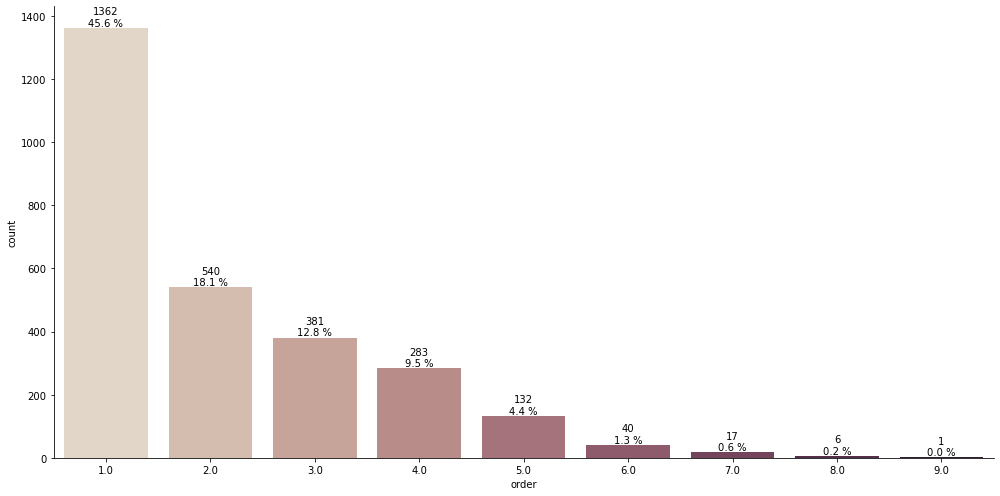

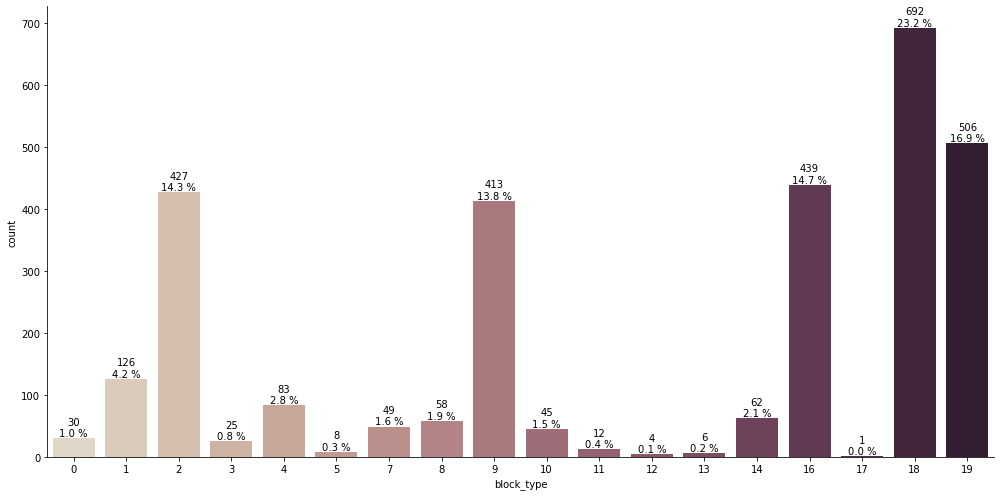

In [45]:
total = len(session_blocks2)
g = sns.catplot(data=session_blocks2, x='order', kind="count", palette="ch:.25", height = 7, aspect = 2)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{v.get_height()}\n{v.get_height()/total * 100.0:.1f} %' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

g = sns.catplot(data=session_blocks2, x='block_type', kind="count", palette="ch:.25", height = 7, aspect = 2)

ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{v.get_height()}\n{v.get_height()/total * 100.0:.1f} %' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    

Most of the session blocks had 1st order (49%), then 2nd (20%), 3rd (14%) etc. There was only one session_bloc with order 9 (0.04%). Most of the session blocks has block type **18** (692, 23%), then **19** (506, 17%), **16** (439, 15%) and the smallest number of session blocks has block type **17** (1, 0.03%).